In [127]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [128]:
## Lets create synthetic data points
from sklearn.datasets import make_regression

In [129]:
X,y=make_regression(n_samples=1000,n_features=2,n_targets=1,noise=3.0)

In [130]:
X


array([[ 0.19634976, -0.03053733],
       [ 0.93775751,  2.1840263 ],
       [-1.82909156,  0.29388086],
       ...,
       [-0.06111409, -0.81341021],
       [ 0.75214497, -0.21219172],
       [ 1.01046487,  1.05816521]])

In [131]:
y

array([  -2.73852504,  182.42693367,   13.99543033,  -27.98851781,
        130.46666881,  -45.95943338,  137.73767329,   63.24575433,
       -126.85308583,  144.025474  ,  -36.76689228,  -24.97931713,
         10.48263198,  -40.0353431 ,  -20.01996859, -144.18352135,
        -55.80410306, -114.08525205,   18.71767926,   18.71030141,
        120.00876757,  143.99438649,    2.39263044,   59.37071464,
        -51.33534956,   -2.69700607,  -35.81225533,   21.45403266,
        -40.16511481,  135.24715485,  -41.77152165,   50.27480552,
         49.11875247,  -61.17752153,   28.68897778,   -9.10291351,
         38.18508745,  -58.65962418,  -56.5065377 ,   11.61808501,
         45.17655882,  -47.63014104,  -18.01436823,  118.41504509,
         34.99723516, -167.59064566,    3.81689857,   43.46252235,
        123.87422664,   69.45578694, -118.67205614,  -38.92707263,
         92.7939718 ,  -10.19542798,    6.02053117,   56.68265108,
       -101.06475042,   12.0891526 ,   12.61920001,   14.29752

In [132]:
pd.DataFrame(X)[0]

0      0.196350
1      0.937758
2     -1.829092
3     -0.609035
4      1.669969
         ...   
995   -0.944322
996   -1.800345
997   -0.061114
998    0.752145
999    1.010465
Name: 0, Length: 1000, dtype: float64

<AxesSubplot: xlabel='0', ylabel='1'>

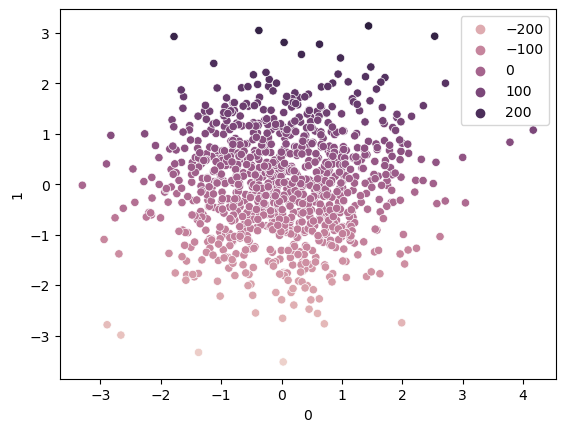

In [133]:
sns.scatterplot(x=pd.DataFrame(X)[0],y=pd.DataFrame(X)[1],hue=y)

In [134]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=10)

In [135]:
from sklearn.svm import SVR

In [136]:
svr=SVR(kernel='linear')

In [137]:
svr.fit(X_train,y_train)

SVR(kernel='linear')

In [138]:
svr.coef_

array([[ 2.85104128, 83.69336563]])

In [139]:
## Prediction
y_pred=svr.predict(X_test)

In [140]:
y_pred

array([-7.14713077e+01, -8.82337630e+01,  5.43243145e+01, -8.06898047e+01,
       -9.07170732e+01,  1.08209044e+01, -2.06510629e+01,  1.21605038e+02,
       -2.36146571e+01, -4.74006781e-02, -6.86027439e+01,  8.89650677e+01,
       -6.06662547e+01, -6.29644004e+01,  1.52207205e+02, -8.81080825e+00,
        8.20140758e+01, -5.42624334e+01,  3.67664995e+01, -1.03223732e+02,
       -6.93919948e+01,  1.40760747e+02,  4.37268649e+01, -7.95992422e-01,
        7.50837297e+00, -5.30837669e+01, -2.12678719e+02, -7.88495973e+01,
        7.53464602e+01,  6.99363093e+01, -3.42403710e+01,  1.57699339e+01,
        1.31182032e+02, -1.52041538e+02, -5.37698377e-01, -1.08049709e+01,
       -1.27596123e+02, -1.02265776e+02, -1.79919662e+02,  1.36302360e+02,
       -1.11635969e+02, -1.73590673e+02, -1.67469533e+01,  1.17833402e+02,
        4.13624619e+01, -5.94997405e+01, -7.31537684e+00, -1.02501129e+02,
        9.02464303e+01, -4.37351306e+01,  1.74576133e+01, -4.39557774e+01,
        2.10159132e+01, -

In [141]:
from sklearn.metrics import r2_score

In [142]:
print(r2_score(y_test,y_pred))

0.9988108288247021


In [143]:
from sklearn.model_selection import GridSearchCV

# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel':['linear'],
              'epsilon':[0.1,0.2,0.3]
              }

In [144]:
grid=GridSearchCV(SVR(),param_grid=param_grid,refit=True,cv=5,verbose=3)

In [145]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 75 candidates, totalling 375 fits
[CV 1/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.794 total time=   0.0s
[CV 2/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.809 total time=   0.0s
[CV 3/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.811 total time=   0.0s
[CV 4/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.816 total time=   0.0s
[CV 5/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.796 total time=   0.0s
[CV 1/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.794 total time=   0.0s
[CV 2/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.809 total time=   0.0s
[CV 3/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.811 total time=   0.0s
[CV 4/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.816 total time=   0.0s
[CV 5/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.796 total time=   0.0s
[CV 1/5] END C=0.1, epsilon=0.1, gamma

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'epsilon': [0.1, 0.2, 0.3],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear']},
             verbose=3)

In [146]:
grid.best_params_

{'C': 10, 'epsilon': 0.1, 'gamma': 1, 'kernel': 'linear'}

In [147]:
## Prediction
y_pred4=grid.predict(X_test)
print(r2_score(y_test,y_pred4))

0.9988557270508278
